# <span style='color:OrangeRed'>V4 REGELALGORITHMEN FÜR DIE DIGITALE REGELUNG - TEIL 3</span>

<p>Gegeben ist das System gemäß des nachfolgenden Blockschaltbilds:</p>

<img src="figures/ClosedLoop.png" alt="drawing" width="600"  height="300"/>

G(s) ist dabei definiert als:

In [1]:
clear all
pkg load control

% Set the Octsim Engine to run the simulation
addpath('../Octsim');

num = [-1 1]
den = [1 4 3]
Gs = tf(num,den)

num =

  -1   1

den =

   1   4   3


Transfer function 'Gs' from input 'u1' to output ...

         -s + 1    
 y1:  -------------
      s^2 + 4 s + 3

Continuous-time model.


<p>Zunächst müssen wir die Regelstreke diskretisieren:</p>

In [2]:
Ts = 0.2
Gz = c2d(Gs,Ts,'zoh')
[numzc,denzc] = tfdata(Gz)
numz = numzc{1}
denz = denzc{1}


Ts =  0.20000

Transfer function 'Gz' from input 'u1' to output ...

        -0.1195 z + 0.1468  
 y1:  ----------------------
      z^2 - 1.368 z + 0.4493

Sampling time: 0.2 s
Discrete-time model.
numzc =
{
  [1,1] =

    -0.11952   0.14679

}

denzc =
{
  [1,1] =

     1.00000  -1.36754   0.44933

}

numz =

  -0.11952   0.14679

denz =

   1.00000  -1.36754   0.44933



<p>Als Regler Gr(z) soll ein zeitdiskreter PID-Regler zum Einsatz kommen, der unter Verwendung eines Schwingversuchs ausglegt werden soll. Die enstrprechenden Einstellwerte für die Auslegung des Reglers sind in der folgenden Tabelle angegeben. Die kritische Frequenz beträgt 2.19 rad/sec. </p>

<img src="figures/Table.png" alt="drawing" width="600"  height="300"/>

In einem ersten Schritt wenden wir die w-Transformation an:

In [3]:
pkg load symbolic
warning('off', 'all');

syms z
syms w

Gzs = (numz(1)*z+numz(2))/(denz(1)*z^2+denz(2)*z+denz(3))
Gzw = subs(Gzs,z,(2+Ts*w)/(2-Ts*w))

Symbolic pkg v2.8.0: Python communication link active, SymPy v1.5.1.
Gzs = (sym)

       431⋅z   226⋅π   
     - ───── + ─────   
        3606    4837   
  ─────────────────────
   2   619⋅π⋅z   1090⋅π
  z  - ─────── + ──────
         1422     7621 

Gzw = (sym)

                     ⎛w    ⎞       
                 431⋅⎜─ + 2⎟       
         226⋅π       ⎝5    ⎠       
         ───── - ────────────      
          4837        ⎛    w⎞      
                 3606⋅⎜2 - ─⎟      
                      ⎝    5⎠      
  ─────────────────────────────────
                                  2
                 ⎛w    ⎞   ⎛w    ⎞ 
           619⋅π⋅⎜─ + 2⎟   ⎜─ + 2⎟ 
  1090⋅π         ⎝5    ⎠   ⎝5    ⎠ 
  ────── - ───────────── + ────────
   7621          ⎛    w⎞          2
            1422⋅⎜2 - ─⎟   ⎛    w⎞ 
                 ⎝    5⎠   ⎜2 - ─⎟ 
                           ⎝    5⎠ 



<p>Jetzt können wir den Controller entwerfen. Wir müssen die Verstärkung der Übertragungsfunktion für die kritische Frequenz berechnen: </p>

In [23]:
omkrit = 2.19
Gg = subs(Gzw,w,1j*omkrit)
Gg = double(simplify(Gg))
Gt = abs(Gg)

omkrit =  2.1900
Gg = (sym)

                                       2         
                            ⎛    219⋅ⅈ⎞          
                   53875000⋅⎜2 + ─────⎟          
           226⋅π            ⎝     500 ⎠          
           ───── - ─────────────────────         
            4837         1889473683              
  ───────────────────────────────────────────────
                                 2              2
                      ⎛    219⋅ⅈ⎞    ⎛    219⋅ⅈ⎞ 
           77375000⋅π⋅⎜2 + ─────⎟    ⎜2 + ─────⎟ 
  1090⋅π              ⎝     500 ⎠    ⎝     500 ⎠ 
  ────── - ─────────────────────── + ────────────
   7621           745100271                     2
                                     ⎛    219⋅ⅈ⎞ 
                                     ⎜2 - ─────⎟ 
                                     ⎝     500 ⎠ 

Gg = -0.2668004 - 0.0011012i
Gt =  0.26680


Anwendung der Tabelle:

In [24]:
Tkrit = 2*pi/omkrit
Kkrit = 1/Gt

Tkrit =  2.8690
Kkrit =  3.7481


In [25]:
Kr = 0.6*Kkrit
Ti = 0.5*Tkrit
Td = 0.125*Tkrit

Kr =  2.2489
Ti =  1.4345
Td =  0.35863


Die Koeffizienten des PID-Reglers sind:

In [26]:
q0 = Kr*(1+Ts/Ti+Td/Ts)
q1 = -Kr*(1+2*Td/Ts)
q2 = Kr*Td/Ts
numr = [q0 q1 q2]
denr = [1 -1 0]
Grz = tf(numr,denr,Ts)

q0 =  6.5949
q1 = -10.314
q2 =  4.0325
numr =

    6.5949  -10.3139    4.0325

denr =

   1  -1   0


Transfer function 'Grz' from input 'u1' to output ...

      6.595 z^2 - 10.31 z + 4.033
 y1:  ---------------------------
                z^2 - z          

Sampling time: 0.2 s
Discrete-time model.


<p>Wir können die Ergebnisse in der Simulation überprüfen.</p>

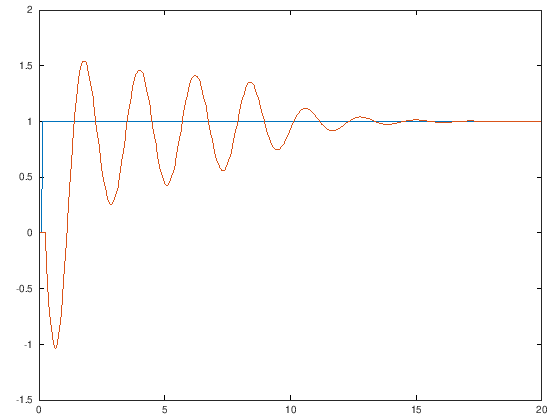

In [28]:
% Number of data flows in the schematic
nflows = 4;
tini = 0;
tfinal = 20;
dt = 0.05;

% Instance of the simulation schematic
sc1 = Schema(tini,tfinal,dt,nflows);

% List of components
c1{1} = StepSource(1,0,1,0.1);
c1{2} = Sum(1,2,3,1,-1);
c1{3} = DTTransferFunction(3,4,numr,denr,Ts);
c1{4} = TransferFunction(4,2,num,den);



sc1.AddListComponents(c1);

% Run the schematic and plot
out1 = sc1.Run([1 2 3]);
plot(out1(1,:),out1(2,:),out1(1,:),out1(3,:));

Wir können die Ergebnis auch mit diesem Matlab/Octave Befehlen überprüfen:


Transfer function 'Gol' from input 'u1' to output ...

      -0.7882 z^3 + 2.201 z^2 - 1.996 z + 0.5919
 y1:  ------------------------------------------
        z^4 - 2.368 z^3 + 1.817 z^2 - 0.4493 z  

Sampling time: 0.2 s
Discrete-time model.

Transfer function 'Gcl' from input 'u1' to output ...

        -0.7882 z^7 + 4.067 z^6 - 8.638 z^5 + 9.67 z^4 - 6.017 z^3 + 1.972 z^2 - 0.266 z  
 y1:  ------------------------------------------------------------------------------------
      z^8 - 5.523 z^7 + 13.31 z^6 - 18.14 z^5 + 15.1 z^4 - 7.649 z^3 + 2.174 z^2 - 0.266 z

Sampling time: 0.2 s
Discrete-time model.


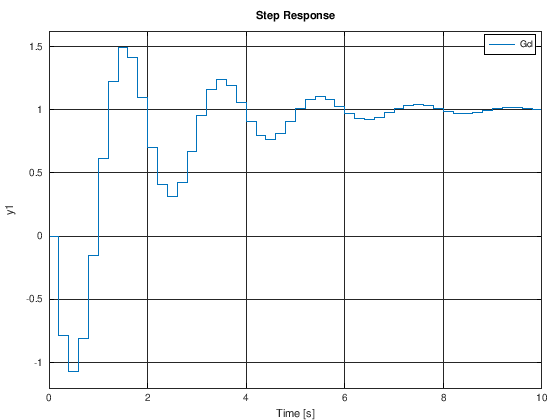

In [29]:
Gol = Grz*Gz
Gcl = Gol/(1+Gol)
step(Gcl)